In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from os.path import join as p_join

import seaborn as sns


##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [2]:
import sys
sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

In [3]:
data_0 = {}
N_POINTS = -1
n_feat=16
data_path = p_join('..', '..', 'data_2')
for prefix in ['L=1.6', 'L=6.6', 'L=7.6', 'L=8.6', 'L=10.6', 'N2=21', 'N2=23', 'N2=25', 'N2=27']:
    FOLDERS = [p_join(os.path.abspath(data_path), item) for item in os.listdir(data_path) if prefix in item]
    X, Y = utils.create_dataset(FOLDERS,feature_nums=n_feat)
    X = utils.normalize_data(X)
    X = X[:N_POINTS]
    Y = Y[:N_POINTS]
    df = pd.DataFrame(data=X)
    
    data_0[f'{prefix}'] = df.corr()

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 20.79it/s]


### Plot Corr matrixes

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


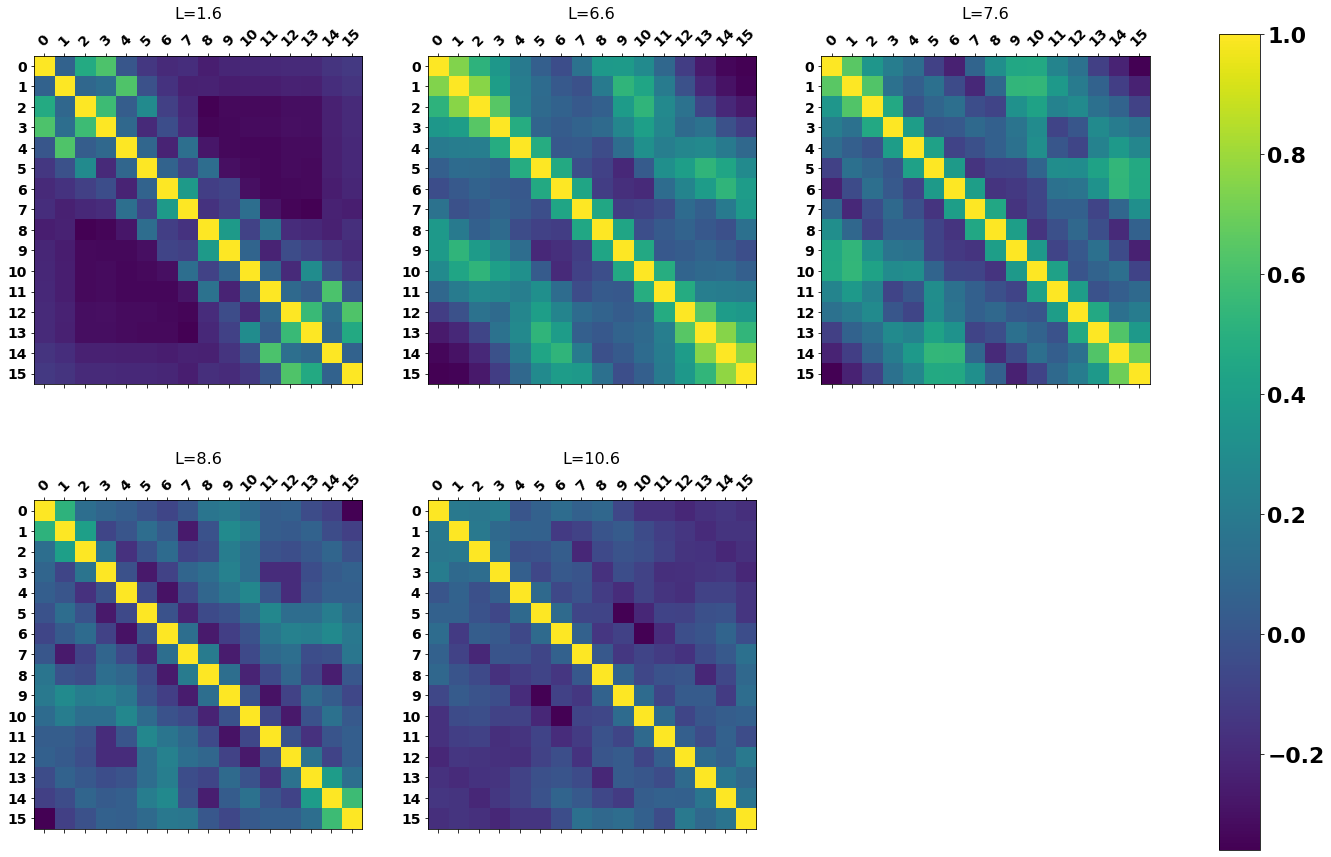

In [4]:
axes = []
fig = plt.figure(figsize=(25, 15))
for i, k in enumerate(data_0):
    if 'L' in k:
        ax = fig.add_subplot(2, 3, i+1)
        axes.append(ax)
        im = ax.matshow(data_0[k])
        ax.set_xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
        ax.set_yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
        ax.set_title(k, fontsize=16)
fig.colorbar(im, ax=axes)
# plt.tight_layout()

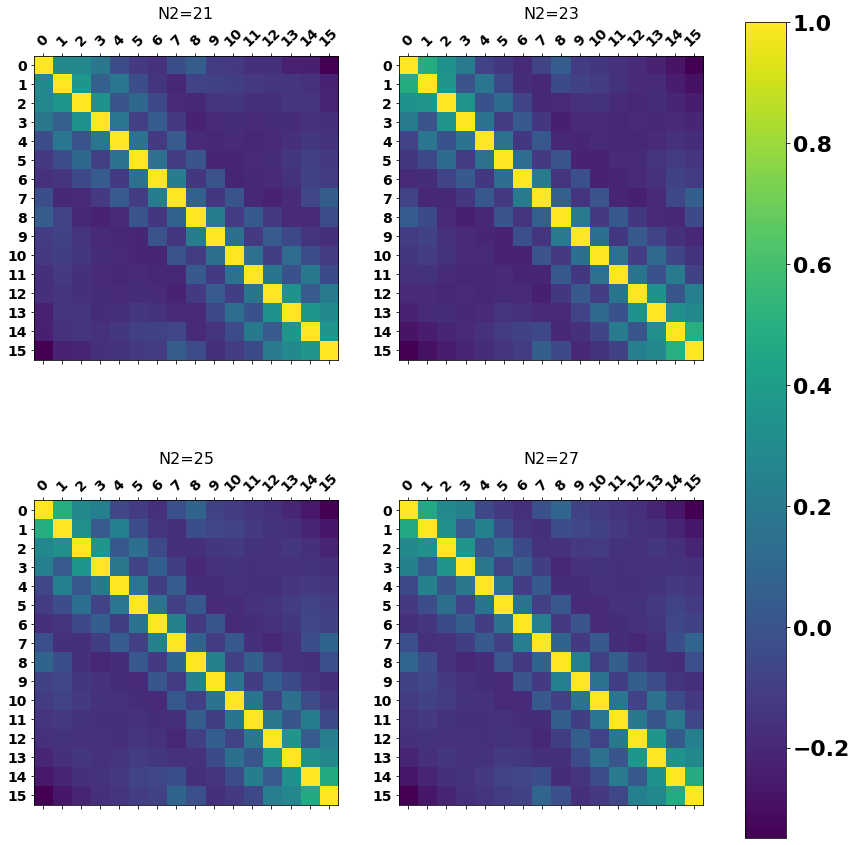

In [5]:
# creates four Axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
  
i = 0
for k in data_0:
    if 'N2' in k:
        ax = axes.flat[i]
        im = ax.matshow(data_0[k])
        ax.set_xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
        ax.set_yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
        ax.set_title(k, fontsize=16)
        i += 1

plt.colorbar(im, ax=axes.ravel().tolist())
pass